# NFL Elimination Picks 2025

reqs:
```
pip install requests numpy scipy pandas matplotlib parsel
```

In [1]:
import datetime
import math
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#%load_ext autoreload
#%autoreload 2

In [3]:
import anysunday
import anysunday.powercalcs
from anysunday import viz, pick

In [4]:
schedule = anysunday.loaders.espn_schedule("./schedules/2025.espn")

https://www.espn.com/nfl/fpi

In [5]:
powers = anysunday.loaders.espn_powers()
pd.DataFrame(powers.items()).T

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,BAL,PHI,KC,DET,BUF,GB,CIN,LAC,WSH,SF,...,IND,LV,ATL,NE,NYG,CAR,NYJ,CLE,TEN,NO
1,5.4,5.3,5.1,4.5,4.2,2.9,2.6,2.3,2.3,1.9,...,-2.2,-2.3,-2.6,-2.9,-3.5,-4.4,-4.5,-4.8,-4.8,-5.6


In [6]:
picks = [
    # "BUF", # week x
]

(<Figure size 800x1000 with 2 Axes>,
 <Axes: xlabel='Week', ylabel='Pick to Win'>)

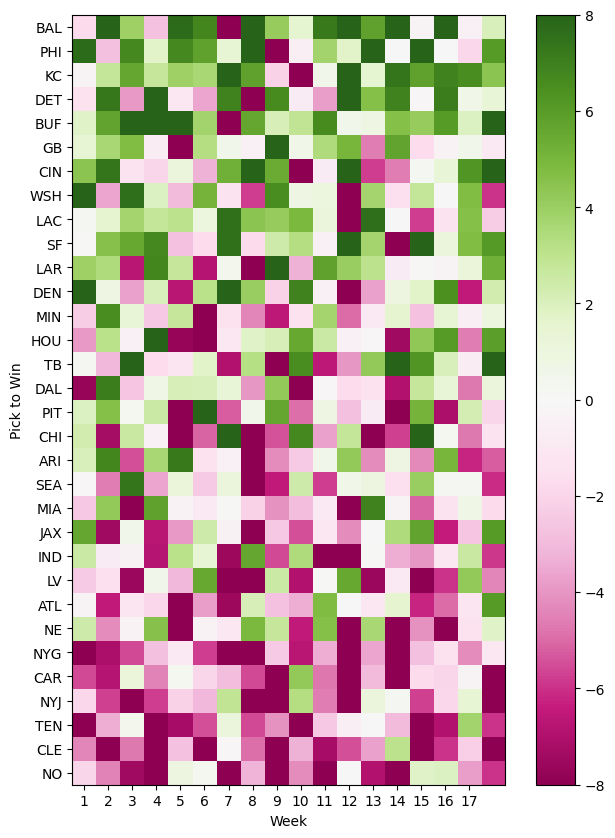

In [7]:
power_rank, matrix = anysunday.powercalcs.pick_grid(powers, schedule, home_bump=3)

viz.plot_matrix(matrix, power_rank)

In [8]:
tuned_home_bump = 3  # default is 3

ppkwargs = {
    "powers": powers,
    "schedule": schedule,
    "home_bump": tuned_home_bump,
    "past_picks": picks
}

In [9]:
pp = pick.Permuter(**ppkwargs)

pprev = pick.Permuter(**ppkwargs)
pprev.pick = pprev.reverse_greedy()

pprand = pick.Permuter(**ppkwargs)
pprand.pick = pprand.random_greedy()

pplg = pick.Permuter(**ppkwargs)
pplg.pick = pplg.limited_greedy(limit=8)

In [10]:
pp.describe_pick()

week  1: diff  +9.4 - picking DEN (+1.6+H) over TEN (-4.8  )
week  2: diff +13.2 - picking BAL (+5.4+H) over CLE (-4.8  )
week  3: diff  +8.9 - picking BUF (+4.2+H) over MIA (-1.7  )
week  4: diff +12.3 - picking DET (+4.5+H) over CLE (-4.8  )
week  5: diff  +7.2 - picking ARI (-0.6+H) over TEN (-4.8  )
week  6: diff  +8.2 - picking PIT (+0.4+H) over CLE (-4.8  )
week  7: diff +10.4 - picking KC  (+5.1+H) over LV  (-2.3  )
week  8: diff +11.8 - picking PHI (+5.3+H) over NYG (-3.5  )
week  9: diff +10.3 - picking GB  (+2.9+H) over CAR (-4.4  )
week 10: diff  +6.7 - picking CHI (+0.2+H) over NYG (-3.5  )
week 11: diff  +5.8 - picking LAR (+1.6+H) over SEA (-1.2  )
week 12: diff  +9.3 - picking SF  (+1.9+H) over CAR (-4.4  )
week 13: diff  +7.6 - picking LAC (+2.3+H) over LV  (-2.3  )
week 14: diff  +9.2 - picking TB  (+0.6+H) over NO  (-5.6  )
week 15: diff  +5.7 - picking JAX (-1.8+H) over NYJ (-4.5  )
week 16: diff  +6.0 - picking HOU (+0.7+H) over LV  (-2.3  )
week 17: diff  +6.2 - pi

In [11]:
pprev.describe_pick()

week  1: diff  +5.6 - picking JAX (-1.8+H) over CAR (-4.4  )
week  2: diff  +7.1 - picking DAL (+0.6+H) over NYG (-3.5  )
week  3: diff  +7.6 - picking WSH (+2.3+H) over LV  (-2.3  )
week  4: diff  +8.5 - picking HOU (+0.7+H) over TEN (-4.8  )
week  5: diff  +7.2 - picking ARI (-0.6+H) over TEN (-4.8  )
week  6: diff  +8.2 - picking PIT (+0.4+H) over CLE (-4.8  )
week  7: diff  +8.8 - picking CHI (+0.2+H) over NO  (-5.6  )
week  8: diff +10.1 - picking CIN (+2.6+H) over NYJ (-4.5  )
week  9: diff +10.3 - picking GB  (+2.9+H) over CAR (-4.4  )
week 10: diff  +6.9 - picking DEN (+1.6+H) over LV  (-2.3  )
week 11: diff  +5.8 - picking LAR (+1.6+H) over SEA (-1.2  )
week 12: diff +11.0 - picking DET (+4.5+H) over NYG (-3.5  )
week 13: diff  +7.6 - picking LAC (+2.3+H) over LV  (-2.3  )
week 14: diff  +9.2 - picking TB  (+0.6+H) over NO  (-5.6  )
week 15: diff +10.6 - picking PHI (+5.3+H) over LV  (-2.3  )
week 16: diff +11.3 - picking BAL (+5.4+H) over NE  (-2.9  )
week 17: diff  +6.5 - pi

In [12]:
pprand.describe_pick()

week  1: diff  +5.6 - picking JAX (-1.8+H) over CAR (-4.4  )
week  2: diff  +7.1 - picking DAL (+0.6+H) over NYG (-3.5  )
week  3: diff  +7.6 - picking WSH (+2.3+H) over LV  (-2.3  )
week  4: diff +12.8 - picking BUF (+4.2+H) over NO  (-5.6  )
week  5: diff  +7.2 - picking ARI (-0.6+H) over TEN (-4.8  )
week  6: diff  +8.2 - picking PIT (+0.4+H) over CLE (-4.8  )
week  7: diff  +7.5 - picking LAC (+2.3+H) over IND (-2.2  )
week  8: diff +10.1 - picking CIN (+2.6+H) over NYJ (-4.5  )
week  9: diff +10.3 - picking GB  (+2.9+H) over CAR (-4.4  )
week 10: diff  +6.9 - picking DEN (+1.6+H) over LV  (-2.3  )
week 11: diff  +5.8 - picking LAR (+1.6+H) over SEA (-1.2  )
week 12: diff +11.0 - picking DET (+4.5+H) over NYG (-3.5  )
week 13: diff  +8.1 - picking PHI (+5.3+H) over CHI (+0.2  )
week 14: diff  +9.2 - picking TB  (+0.6+H) over NO  (-5.6  )
week 15: diff  +8.0 - picking CHI (+0.2+H) over CLE (-4.8  )
week 16: diff +11.3 - picking BAL (+5.4+H) over NE  (-2.9  )
week 17: diff  +6.5 - pi

In [13]:
pplg.describe_pick()

week  1: diff  +8.8 - picking WSH (+2.3+H) over NYG (-3.5  )
week  2: diff +13.2 - picking BAL (+5.4+H) over CLE (-4.8  )
week  3: diff  +8.1 - picking TB  (+0.6+H) over NYJ (-4.5  )
week  4: diff  +8.5 - picking HOU (+0.7+H) over TEN (-4.8  )
week  5: diff +10.1 - picking BUF (+4.2+H) over NE  (-2.9  )
week  6: diff  +8.2 - picking PIT (+0.4+H) over CLE (-4.8  )
week  7: diff  +8.1 - picking DEN (+1.6+H) over NYG (-3.5  )
week  8: diff +10.1 - picking CIN (+2.6+H) over NYJ (-4.5  )
week  9: diff +10.2 - picking LAR (+1.6+H) over NO  (-5.6  )
week 10: diff  +6.7 - picking CHI (+0.2+H) over NYG (-3.5  )
week 11: diff  +4.8 - picking ATL (-2.6+H) over CAR (-4.4  )
week 12: diff  +9.3 - picking SF  (+1.9+H) over CAR (-4.4  )
week 13: diff  +8.1 - picking PHI (+5.3+H) over CHI (+0.2  )
week 14: diff  +7.4 - picking KC  (+5.1+H) over HOU (+0.7  )
week 15: diff  +5.7 - picking JAX (-1.8+H) over NYJ (-4.5  )
week 16: diff  +7.1 - picking DET (+4.5+H) over PIT (+0.4  )
week 17: diff  +4.6 - pi